In [1]:
import os
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt

In [2]:
pth = os.path.join('..', '..', '..')
pth_data = os.path.join(pth, 'data')
pth_pred = os.path.join(pth_data, 'modeling', 'predict')
pth_out = os.path.join(pth, 'figures', 'modeling', 'processed', 'CCCA')

In [3]:
adata = sc.read_h5ad(os.path.join(pth_pred, 'CCCA_malignant.h5ad'))
adata.obsm['X_umap'] = adata.obs[['umap1', 'umap2']].astype(float).values
adata

AnnData object with n_obs × n_vars = 1434229 × 856
    obs: 'sample', 'cell_type', 'complexity', 'umap1', 'umap2', 'g1s_score', 'g2m_score', 'cell_cycle_phase', 'mp_top_score', 'mp_top', 'mp_assignment', 'ebv', 'celltype', 'Title', 'Category', 'Disease', 'Technology', 'Samples', 'Cells ', 'Name', 'patient', 'cell_subtype', 'source', 'disease', 'p16_status', 'site', 't_stage', 'n_stage', 'gender', 'race', 'age', 'tobacco_use', 'alcohol_use', 'hpv', 'hpv_score', 'treatment', 'procedure', 'sorting', 'cluster', 'malignant', 'sample_id', 'cell_subtype_clusters', 'tnm_stage', 'treatment_exposure', 'treatment_response', 'cell_lineage', 'type', 'clusters_by_authors', 'cell_QCpass', 'is_tumor', 'cell_compartment', 'cluster_assignment', 'metastasis', 'sex', 'prior_enzalutamide', 'prior_abiraterone', 'prior_taxane', 'prior_platinum', 'prior_sipuleucel_T', 'purity', 'has_bulk_RNA', 'cancer_cell_state', 'PSA', 'source_region', 'gleason_score', 'ERG_status', 'cores', 'post_op_gleason_score', 'margin

In [4]:
vmin, vmax, cmap = 0, 1, 'inferno'

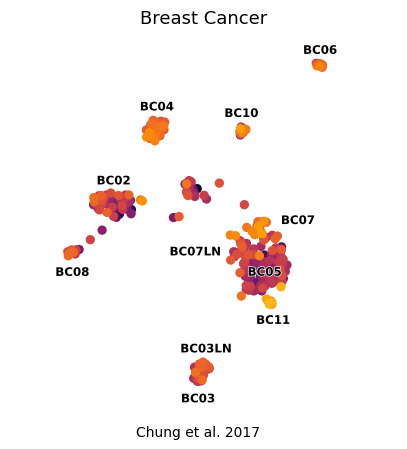

In [6]:
name = 'Data_Chung2017_Breast'
adata_plt = adata[adata.obs.Name == name].copy()

fig, ax = plt.subplots(1, 1, figsize = (5, 5))
sc.pl.umap(adata_plt, color = 'latent_z', size = 180,
           cmap = cmap, vmin = vmin, vmax = vmax,
           frameon = False, colorbar_loc = None,
           show = False, ax = ax)
sc.pl.umap(adata_plt, color = 'sample', size = 180, alpha = 0,
           legend_loc = 'on data', legend_fontsize = 8.5,
           na_in_legend = False, legend_fontoutline = 1,
           frameon = False, show = False, ax = ax)
xlim = ax.get_xlim()
ylim = ax.get_ylim()
ax.set_xlim(xlim[0] - 5, xlim[1] - 10)
ax.set_ylim(ylim[0] - 3.75, ylim[1] + 3)

label_dict = {'BC01' : ''}
pos_dict = {
    'BC02'   : (0, 4),
    'BC03'   : (0, -4),
    'BC03LN' : (0, 3.33),
    'BC04'   : (-.5, 5.75),
    'BC05'   : (-.5, -.25),
    'BC06'   : (0, 2.75),
    'BC07'   : (5.25, 2),
    'BC07LN' : (-6.33, -.75),
    'BC08'   : (0, -4),
    'BC10'   : (0, 3.25),
    'BC11'   : (.5, -3.75)}

for label in ax.texts:
    _label_ = label.get_text()
    x, y = label.get_position()
    if _label_ in label_dict:
        label.set_text(label_dict[_label_])
    if _label_ in pos_dict:
        dx, dy = pos_dict[_label_]
        label.set_position([x + dx, y + dy])

ax.set_title(adata_plt.obs.Disease.cat.categories[0], size = 13)
ax.text(.325, -.05, adata_plt.obs.Title.cat.categories[0], transform = ax.transAxes)
fn = os.path.join(pth_out, f'{name}.pdf')
plt.savefig(fn, bbox_inches = 'tight')

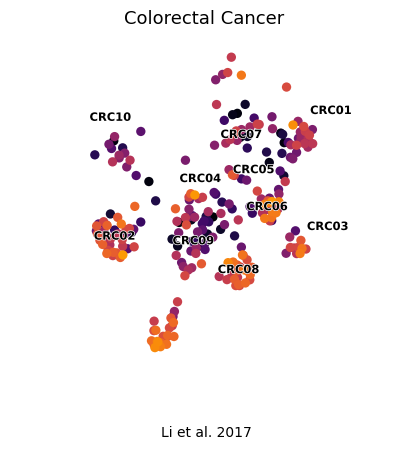

In [8]:
name = 'Data_Li2017_Colorectal'
adata_plt = adata[adata.obs.Name == name].copy()
sample = adata_plt.obs['sample'].str
sample = sample.replace('_tumour', '')
adata_plt.obs['sample'] = sample

fig, ax = plt.subplots(1, 1, figsize = (5, 5))
sc.pl.umap(adata_plt, color = 'latent_z', size = 180,
           cmap = cmap, vmin = vmin, vmax = vmax,
           frameon = False, colorbar_loc = None,
           show = False, ax = ax)
sc.pl.umap(adata_plt, color = 'sample', size = 180, alpha = 0,
           legend_loc = 'on data', legend_fontsize = 8.25,
           na_in_legend = False, legend_fontoutline = 1,
           frameon = False, show = False, ax = ax)
xlim = ax.get_xlim()
ylim = ax.get_ylim()
dx, dy = 7, 5
ax.set_xlim(xlim[0] - dx, xlim[1] + dx)
ax.set_ylim(ylim[0] - dy, ylim[1] + dy - 4)

pos_dict = {
    'CRC01' : (3.25, 2.5),
    'CRC02' : (0, -.25),
    'CRC03' : (3, 1.9),
    'CRC04' : (-.75, 1.66),
    'CRC05' : (1.5, .5),
    'CRC06' : (-.25, -.25),
    'CRC07' : (.25, 0),
    'CRC08' : (.1, 0),
    'CRC09' : (.75, .75),
    'CRC10' : (-1, 3.33)}

for label in ax.texts:
    _label_ = label.get_text()
    x, y = label.get_position()
    if _label_ in pos_dict:
        dx, dy = pos_dict[_label_]
        label.set_position([x + dx, y + dy])

ax.set_title(adata_plt.obs.Disease.cat.categories[0], size = 13)
ax.text(.39, -.05, adata_plt.obs.Title.cat.categories[0], transform = ax.transAxes)
fn = os.path.join(pth_out, f'{name}.pdf')
plt.savefig(fn, bbox_inches = 'tight')

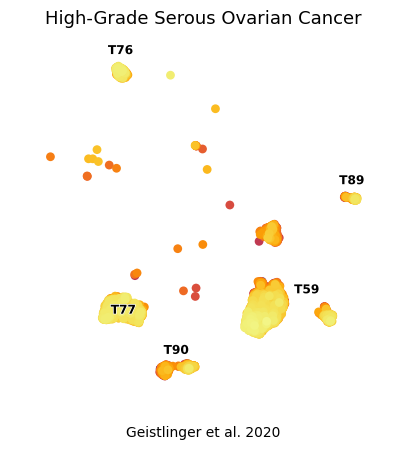

In [10]:
name = 'Data_Geistlinger2020_Ovarian'
adata_plt = adata[adata.obs.Name == name].copy()

fig, ax = plt.subplots(1, 1, figsize = (5, 5))
sc.pl.umap(adata_plt, color = 'latent_z', size = 160,
           cmap = cmap, vmin = vmin, vmax = vmax,
           frameon = False, colorbar_loc = None,
           show = False, ax = ax)
sc.pl.umap(adata_plt, color = 'sample', size = 160, alpha = 0,
           legend_loc = 'on data', legend_fontsize = 8.75,
           na_in_legend = False, legend_fontoutline = 1,
           frameon = False, show = False, ax = ax)
xlim = ax.get_xlim()
ylim = ax.get_ylim()
dx, dy = 5, 5
ax.set_xlim(xlim[0] - dx, xlim[1] + dx)
ax.set_ylim(ylim[0] - dy, ylim[1] + dy - 1.25)

pos_dict = {
    'T59' : (7.75, 4.5),
    'T76' : (-.25, 4.5),
    'T77' : (-2.6, -.25),
    'T89' : (-.5, 3.5),
    'T90' : (2, 3.6)}

for label in ax.texts:
    _label_ = label.get_text()
    x, y = label.get_position()
    if _label_ in pos_dict:
        dx, dy = pos_dict[_label_]
        label.set_position([x + dx, y + dy])

ax.set_title(adata_plt.obs.Disease.cat.categories[0], size = 13)
ax.text(.3, -.05, adata_plt.obs.Title.cat.categories[0], transform = ax.transAxes)
fn = os.path.join(pth_out, f'{name}.pdf')
plt.savefig(fn, bbox_inches = 'tight')

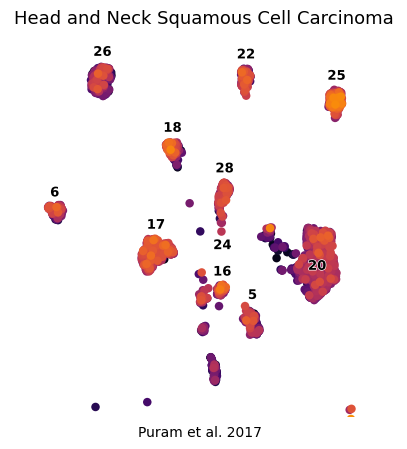

In [11]:
name = 'Data_Puram2017_Head-and-Neck'
adata_plt = adata[adata.obs.Name == name].copy()

fig, ax = plt.subplots(1, 1, figsize = (5, 5))
sc.pl.umap(adata_plt, color = 'latent_z', size = 150,
           cmap = cmap, vmin = vmin, vmax = vmax,
           frameon = False, colorbar_loc = None,
           show = False, ax = ax)
sc.pl.umap(adata_plt, color = 'sample', size = 150, alpha = 0,
           legend_loc = 'on data', legend_fontsize = 9.5,
           na_in_legend = False, legend_fontoutline = 1,
           frameon = False, show = False, ax = ax)
xlim = ax.get_xlim()
ylim = ax.get_ylim()
ax.set_xlim(xlim[0] - 4, xlim[1] - 6)
ax.set_ylim(ylim[0] + 43, ylim[1] + .25)

label_dict = {
    '7'  : '',
    '8'  : '',
    '9'  : '',
    '10' : '',
    '12' : '',
    '13' : ''}

pos_dict = {
    '5'  : (0, 3.33),
    '6'  : (-.85, 2.25),
    '16' : (.33, 2.25),
    '17' : (.7, 3.5),
    '18' : (-1, 3.5),
    '22' : (.25, 2.5),
    '24' : (-.25, -1.75),
    '25' : (.25, 3.25),
    '26' : (.66, 3.5),
    '28' : (.33, 3)}

for label in ax.texts:
    _label_ = label.get_text()
    x, y = label.get_position()
    if _label_ in label_dict:
        label.set_text(label_dict[_label_])
    if _label_ in pos_dict:
        dx, dy = pos_dict[_label_]
        label.set_position([x + dx, y + dy])

ax.set_title(adata_plt.obs.Disease.cat.categories[0], size = 13)
ax.text(.33, -.05, adata_plt.obs.Title.cat.categories[0], transform = ax.transAxes)
fn = os.path.join(pth_out, f'{name}.pdf')
plt.savefig(fn, bbox_inches = 'tight')

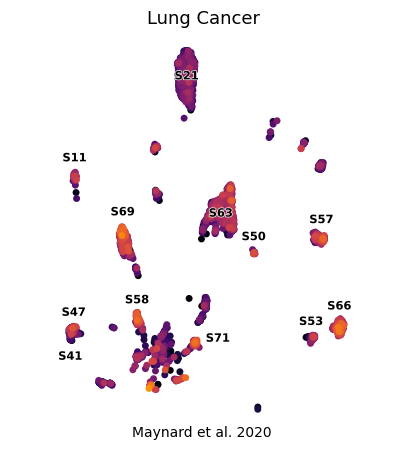

In [12]:
name = 'Data_Maynard2020_Lung'
adata_plt = adata[adata.obs.Name == name].copy()
sample = adata_plt.obs['sample'].str
sample = sample.replace('LT_', '')
adata_plt.obs['sample'] = sample

pos_dict = {
    'S11' : (0, 1.5),
    'S21' : (0, 0),
    'S41' : (0, -1.4),
    'S47' : (-.25, 1.25),
    'S50' : (0, 1.33),
    'S53' : (-.25, 1.25),
    'S57' : (0, 1.5),
    'S58' : (0, 1.33),
    'S63' : (.25, 0),
    'S66' : (0, 1.75),
    'S69' : (0, 2.25),
    'S71' : (4.25, .4)}

fig, ax = plt.subplots(1, 1, figsize = (5, 5))
sc.pl.umap(adata_plt, color = 'latent_z', size = 100,
           cmap = cmap, vmin = vmin, vmax = vmax,
           frameon = False, colorbar_loc = None,
           show = False, ax = ax)
sc.pl.umap(adata_plt, color = 'sample', groups = pos_dict,
           size = 100, alpha = 0, legend_loc = 'on data',
           legend_fontsize = 8.25, na_in_legend = False,
           legend_fontoutline = 1, frameon = False,
           show = False, ax = ax)
xlim = ax.get_xlim()
ylim = ax.get_ylim()
ax.set_xlim(xlim[0] - 2, xlim[1] + 7)
ax.set_ylim(ylim[0] + 33.5, ylim[1] - 1.5)

for label in ax.texts:
    _label_ = label.get_text()
    x, y = label.get_position()
    if _label_ in pos_dict:
        dx, dy = pos_dict[_label_]
        label.set_position([x + dx, y + dy])

ax.set_title(adata_plt.obs.Disease.cat.categories[0], size = 13)
ax.text(.315, -.05, adata_plt.obs.Title.cat.categories[0], transform = ax.transAxes)
fn = os.path.join(pth_out, f'{name}.pdf')
plt.savefig(fn, bbox_inches = 'tight')